In [1]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [2]:
# definición de la distribución binomial
def my_binomial(k, n, p):
  return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [3]:
print('my binomial: {}'.format(my_binomial(2, 3, 0.5))) #Distribución binomial manual
dist = binom(3, 0.5) #Distribución binomial Scipy
dist.pmf(2) #Densidad de probabilidad

my binomial: 0.375


0.3750000000000001

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [4]:
print(7/8.0)
dist.cdf(2) #Distribución de probabilidad acumulada dada la distribución binomial dada arriba

0.875


0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [21]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)

1

In [6]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
arr = []
for _ in range(100):
  arr.append(binomial(n, p))

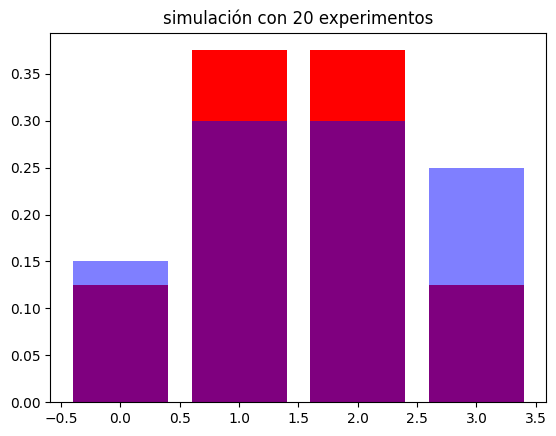

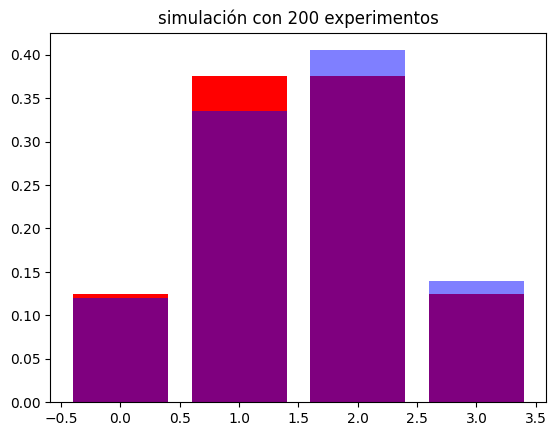

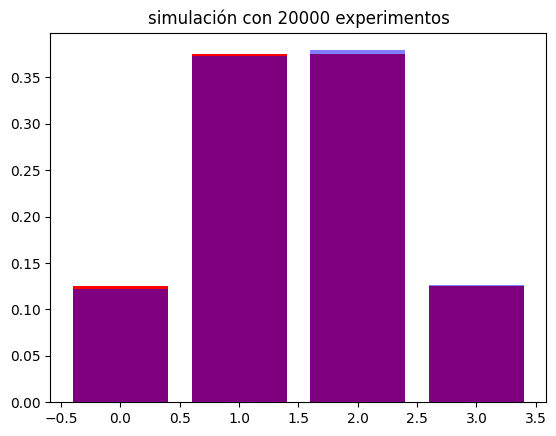

In [7]:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, distribucion_teorica, label = 'teoría', color = 'red')
  plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')
  plt.title('simulación con {} experimentos'.format(num_trials))
  plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(20000)